<a href="https://colab.research.google.com/github/JiscDACT/PositivelySkewed/blob/main/Advanced%20Python/Advanced%20Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Stats 101

This is the second workbook in the series, last time we covered; Importing libraries, Importing data, Data types and functions, Dataframes, Dropping nulls/duplicates, and Filtering data. 

This workbook will introduce statistical coding in Python including the following:

* Data types
* Averages
* Standard deviation
* Boxplots
* Feature engineering


We will be using the following libraries: 
```
- pandas
- seaborn
- matplotlib
- numpy
- sklearn
```

In [ ]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np
from sklearn import preprocessing

##Load the data

We will utilise the Seaborn tips dataset for our examples. 

In [ ]:
tips = sns.load_dataset("tips")

The Tips dataset is a built in dataset supplied with the seaborn library. The Tips dataset is a data frame with 244 rows and 7 variables which represents some tipping data where one waiter recorded information about each tip he received over a period of a few months working in one restaurant. In all the waiter recorded 244 tips.

##Data types
Data can be split into three categories: discrete, continuous and categorical.


*   **Discrete data**: numerical data that can only take specific values. Generally these take an integer form but can sometimes be a float.
  
  Examples include number of dependants, shoe size and test scores.
*   **Continuous data**: numerical data that can take any value. This generally is in the form of a float.

  Examples include height of a person, temperature and time.

*   **Categorical data**: data whose values describe some characteristic or category. This can be in the form of category, object or string.

  Examples include eye colour, race and age group.





Let's view the top 5 rows of data to gain a better understanding of the dataset's content.

In [ ]:
tips.head(5) 

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


There are two ways we can view the data types of the dataset. We can use `info()` to view all fields data types or we can use dtypes to view specific field datatypes.

In [ ]:
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [ ]:
tips['smoker'].dtypes

CategoricalDtype(categories=['Yes', 'No'], ordered=False)

From this, we can see that the data types are: 

*   Categorical: sex, smoker, day and time
*   Discrete: size, total_bill and tip

You may have thought that total_bill and tip are continuous data however money  comes in clear steps of one penny therefore it is a discrete variable.





If, as part of our data cleansing, we required to change the data types of a column in the dataframe, we could do it as so:

In [ ]:
#We are creating a separate column so we are not changing our base data
tips['total_bill_2']= tips['total_bill']

In [ ]:
tips['total_bill_2'] = tips['total_bill_2'].astype(int)

In [ ]:
tips.head(5)

,total_bill,tip,sex,smoker,day,time,size,total_bill_2
0,16.99,1.01,Female,No,Sun,Dinner,2,16
1,10.34,1.66,Male,No,Sun,Dinner,3,10
2,21.01,3.50,Male,No,Sun,Dinner,3,21
3,23.68,3.31,Male,No,Sun,Dinner,2,23
4,24.59,3.61,Female,No,Sun,Dinner,4,24


In [ ]:
tips['total_bill_2'].dtypes

dtype('int64')

We can see that the float data for total_bill_3 has now been transformed into an integer. This does not perform any rounding on the data - it simply removes any numbers to the right of the decimal point. 

In [ ]:
#Drop the column
tips = tips.drop('total_bill_2', 1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  


In [ ]:
tips.head(5)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


### Exercise 1
We will be using the Iris dataset.

In [ ]:
iris = sns.load_dataset('iris')

View the top 7 rows of the dataset.

In [ ]:
#Insert answer here



In [ ]:
#@markdown Click here for answer
iris.head(7)

### Exercise 2
Identify the data types for each of the fields in the iris dataset.

In [ ]:
#Insert answer here


In [ ]:
#@markdown Click here for answer
iris.info()

#Continuous: sepal_length, sepal_width, petal_length, petal_width
#Categorical: species


##Averages, standard deviation and other useful statistics

###Averages

There are three main types of average:

**Mean**: The most common average. 

- Add all the values and divide by the number of values

**Median**: The middle value

- Put numbers in ascending order and choose the middle value. If there is an even number, take the mean of the two middle values.

**Mode**: Most common value

- Look for the most frequently occurring value



When calculating the averages of the following dataset, the results differ depending on the different type of average.

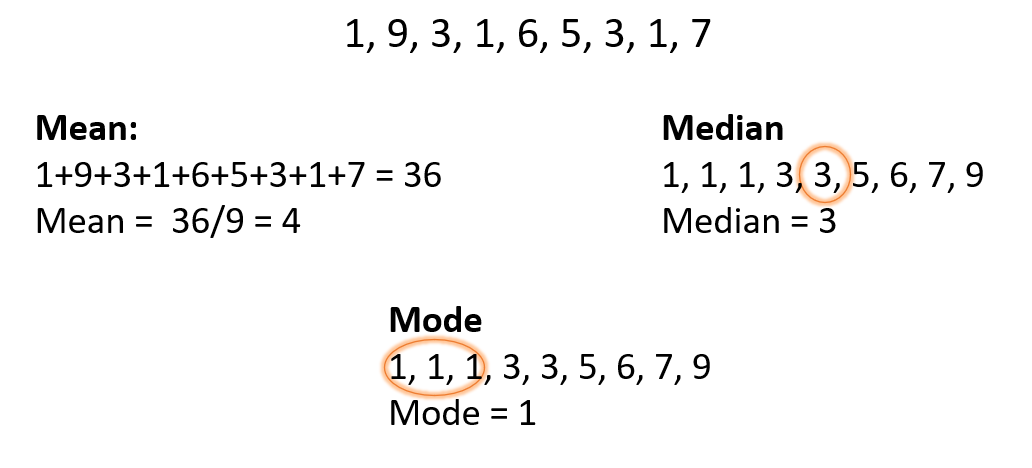

####**Advantages and disadvantages**

It should be noted that there is no such thing as a 'best average'. It is completely dependent on which is best for your data.

Each method has different advantages and disadvantages that you can consider:

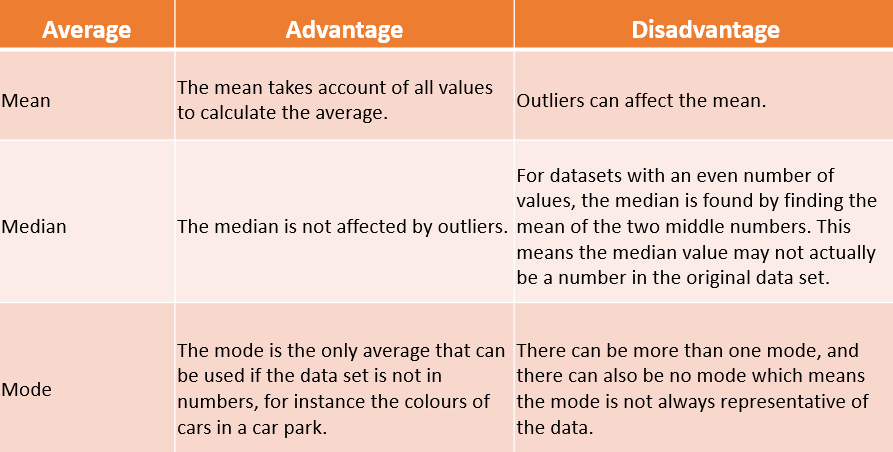

We can use `mean()`, `median()` and `mode()` to calculate these values for specific fields.

In [ ]:
#Mean tip
tips['tip'].mean()

2.99827868852459

In [ ]:
#Mode party size
tips['size'].mode()

0    2
dtype: int64

In [ ]:
#Maximum party size
tips['size'].max()

6

We can even use this method to calculate the mean of a smaller subset of the data.

In [ ]:
#Mean tip amount for parties of 4+
tips[tips['size']>=4]['tip'].mean()

4.218478260869565

###Standard deviation

*   Standard deviation is an important measure of the spread of the data from the mean.
*   A low standard deviation means that most of the numbers within the dataset are close to the average. 
*   A high standard deviation means that the numbers in the dataset are more spread out.
*   Variance is the square of the standard deviation.







The standard deviation can be calculated as so:

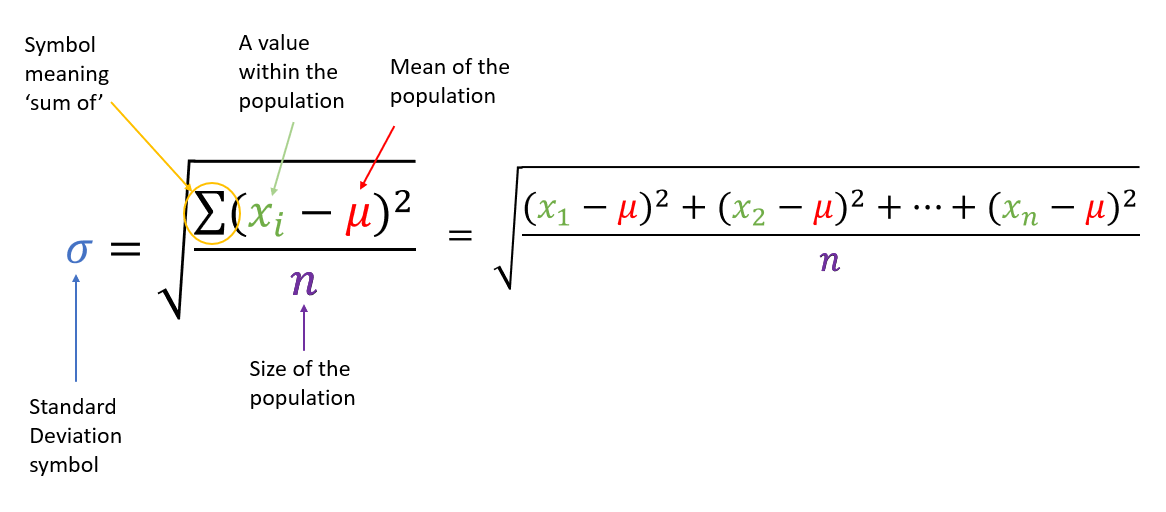

Although this is useful to know, we can use code to calculate this for us using `std()`

In [ ]:
#Standard deviation of tips
tips['tip'].std()

1.3836381890011822

We can use `describe()` to gain all these useful statistics and more on the whole of our dataset.

In [ ]:
tips.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


As we can see from the above, this performs calculations on the numerical data. It would not make sense to do the same on the categorical data.

### Exercise 3
Calculate the median sepal width.

In [ ]:
#Insert answer here


In [ ]:
#@markdown Click here for answer

iris['sepal_width'].median()

### Exercise 4 
Find the key stats such as maximum, mean and standard deviation for each of the fields.

In [ ]:
#Insert answer here


In [ ]:
#@markdown Click here for answer

iris.describe()

### Exercise 5
Calculate the mean petal width for the 'setosa' species.

In [ ]:
#Insert answer here


In [ ]:
#@markdown Click here for answer
iris[iris['species']=='setosa']['petal_width'].mean()

0.24599999999999997

##Boxplots
Boxplots are a great way of visualising the numerical data within a dataset as it provides a good indication of how the values in the data are spread out and can help identify outliers.

It does this with five key values:

*   Minimum
*   25th percentile or the first quartile (Q1)
*   Median
*   75th percentile or the third quartile (Q3)
*   Maximum

Boxplots in python also show which data points are located outside the whiskers of the box plot. This is where the data points are outside 1.5 times the interquartile range above the upper quartile and below the lower quartile.

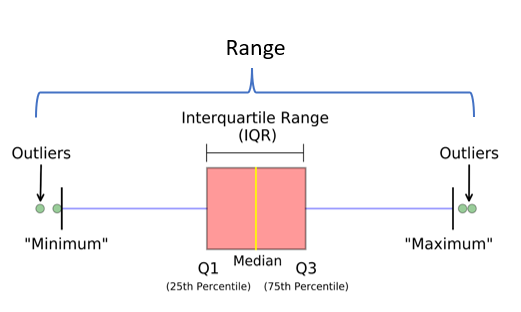

We can use the following code to create box plots of all the numerical data in the dataset. This can be useful for a quick overview - perhaps to quickly identify fields we want to investigate further in outlier analysis. 

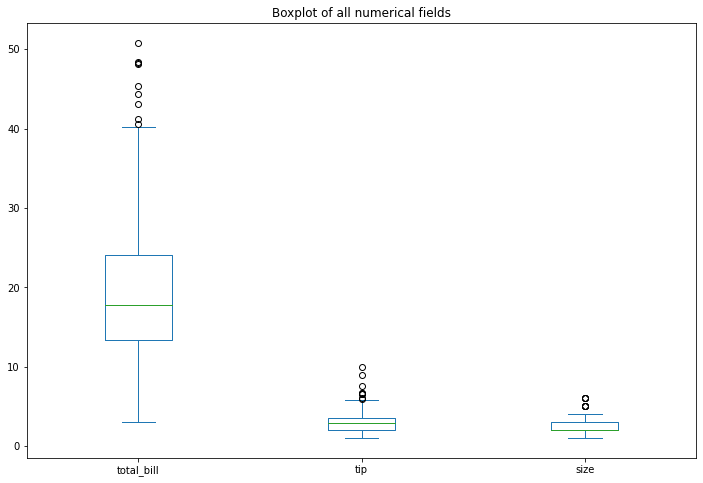

In [ ]:
tips.plot(kind='box', figsize=(12, 8),title='Boxplot of all numerical fields');

Alternatively we can just show a box plot of one field to get a more detailed view of just one field.

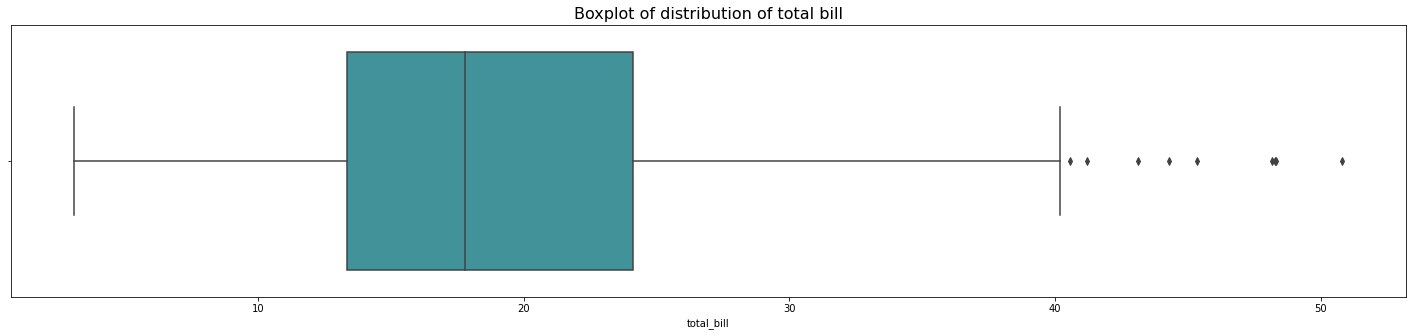

In [ ]:
plt.figure(figsize=(25,5))
plt.title('Boxplot of distribution of total bill', fontsize=16)
sns.boxplot(x=tips["total_bill"],color='#329ea8');

The `plt.figure()` function creates a figure object elements are added on top of this space such as the plot, the axis, legends, titles etc. `plt.title()` is a function that adds a title to the plot figure.

Finally, we can compare boxplots by different categories. Please note that the x field should be either a discrete or categorical field.

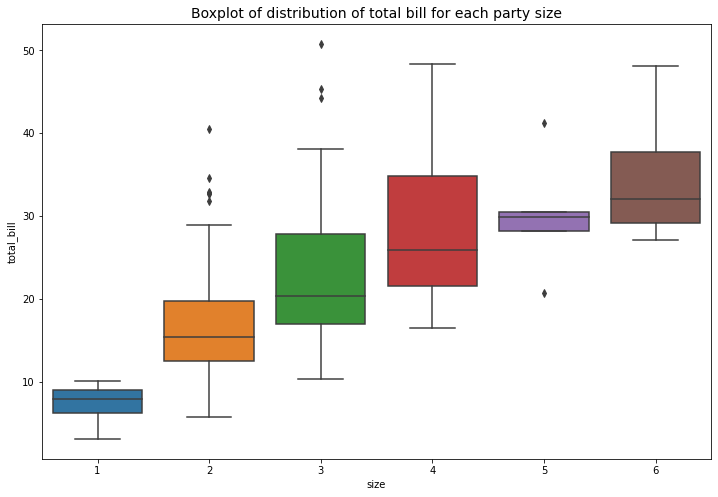

In [ ]:
plt.figure(figsize=(12, 8))
plt.title('Boxplot of distribution of total bill for each party size', fontsize=14)
sns.boxplot(x=tips['size'] , y = tips['total_bill']);

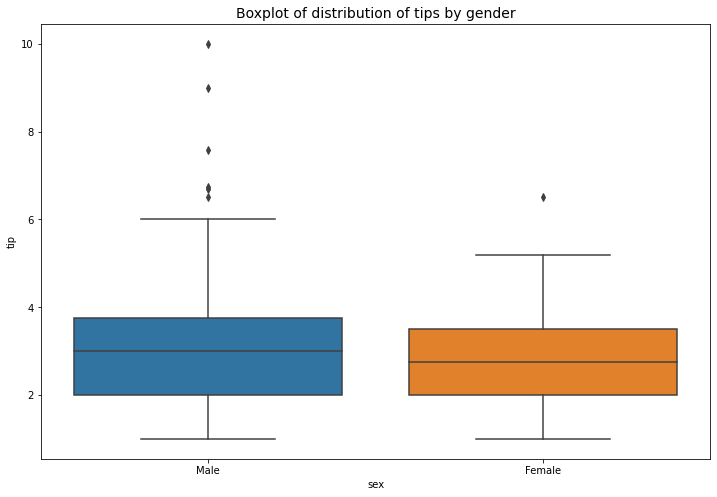

In [ ]:
plt.figure(figsize=(12, 8))
plt.title('Boxplot of distribution of tips by gender', fontsize=14)
sns.boxplot(x=tips['sex'] , y = tips['tip']);

### Exercise 6
Create a boxplot for the field sepal_length.

In [ ]:
#Insert answer here


In [ ]:
#@markdown Click here for answer
plt.title('Boxplot of distribution of sepal lengths')
sns.boxplot(x=iris["sepal_length"]);

### Exercise 7 
Create a boxplot for petal width by species.

In [ ]:
#Insert answer here


In [ ]:
#@markdown Click here for answer

plt.figure(figsize=(12, 8))
plt.title('Boxplot of distribution of petal width by species', fontsize=14)
sns.boxplot(x=iris['species'] , y = iris['petal_width']);

##Feature engineering

Feature engineering is a technique where new variables (aka features) are created through transforming other variables within the dataset into a form which is easier to interpret. The general goal of this is to prepare the data for input into a model or algorithm as well as improve the performance of these algorithms. Below we will show some examples of feature engineering.

We can use the following code to create a new field which calculates what percentage of the bill the tip is. This would add more insight to the data as a £1 tip would be a very small tip on a £100 bill however would be quite significant on a £3 bill.

In [ ]:
tips['percentage'] = (tips['tip']/tips['total_bill'])*100

#Review dataframe
tips.head()

,total_bill,tip,sex,smoker,day,time,size,percentage
0,16.99,1.01,Female,No,Sun,Dinner,2,5.944673
1,10.34,1.66,Male,No,Sun,Dinner,3,16.054159
2,21.01,3.50,Male,No,Sun,Dinner,3,16.658734
3,23.68,3.31,Male,No,Sun,Dinner,2,13.978041
4,24.59,3.61,Female,No,Sun,Dinner,4,14.680765


Another useful field may be to classify the days by weekend and weekday. We can utilise numpy to add these conditions. 

In [ ]:
# create a list of our conditions
conditions = [
    (tips['day'] == 'Sun'),
    (tips['day'] == 'Sat')
    ]

# create a list of the values we want to assign for each condition
values = ['weekend', 'weekend']

# create a new column and use np.select to assign values to it using our lists as arguments. The last arguement within the select statement is the default case where the other conditions are not met
tips['weekend'] = np.select(conditions, values, 'weekday')

# display updated DataFrame
tips.head()

,total_bill,tip,sex,smoker,day,time,size,percentage,weekend
0,16.99,1.01,Female,No,Sun,Dinner,2,5.944673,weekend
1,10.34,1.66,Male,No,Sun,Dinner,3,16.054159,weekend
2,21.01,3.50,Male,No,Sun,Dinner,3,16.658734,weekend
3,23.68,3.31,Male,No,Sun,Dinner,2,13.978041,weekend
4,24.59,3.61,Female,No,Sun,Dinner,4,14.680765,weekend


Another aspect of feature engineering is encoding categorical data. Models cannot understand catoegorical data so encoding it into numerical data is essential. Some popular methods are Label encoding, One-Hot encoding (OHE) and Ordinal encoding. We will focus on Label encoding here but please look up the other methodologies to help develop your understanding.

We will encode the smoker field using `LabelEncoder()`.

In [ ]:
label_encoder = preprocessing.LabelEncoder()

#Apply the encoder to the field within the dataframe
tips['smoker'] = label_encoder.fit_transform(tips['smoker'])

#Review dataframe
tips.head()

,total_bill,tip,sex,smoker,day,time,size,percentage,weekend
0,16.99,1.01,Female,0,Sun,Dinner,2,5.944673,weekend
1,10.34,1.66,Male,0,Sun,Dinner,3,16.054159,weekend
2,21.01,3.50,Male,0,Sun,Dinner,3,16.658734,weekend
3,23.68,3.31,Male,0,Sun,Dinner,2,13.978041,weekend
4,24.59,3.61,Female,0,Sun,Dinner,4,14.680765,weekend


You can see above that rather than creating a new column for this, we have replaced the current column with the encoded data.

If we require to do all the categorical data in the dataframe, we can do it as so:

In [ ]:
label_encoder = preprocessing.LabelEncoder()

#Select the columns we want to encode
cols = ['sex', 'day', 'time','weekend']

# Encode labels of multiple columns at once
tips[cols] = tips[cols].apply(label_encoder.fit_transform)

# Print head
tips.head()

,total_bill,tip,sex,smoker,day,time,size,percentage,weekend
0,16.99,1.01,0,0,2,0,2,5.944673,1
1,10.34,1.66,1,0,2,0,3,16.054159,1
2,21.01,3.50,1,0,2,0,3,16.658734,1
3,23.68,3.31,1,0,2,0,2,13.978041,1
4,24.59,3.61,0,0,2,0,4,14.680765,1


In [ ]:
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    int64   
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
 7   percentage  244 non-null    float64 
 8   weekend     244 non-null    object  
dtypes: category(3), float64(3), int64(2), object(1)
memory usage: 12.7+ KB


### Exercise 8
Create a new field where petal lengths larger than the mean are categorised as small and those larger than and including the mean are categorised as large.

In [ ]:
#@markdown Click here for answer
# create a list of our conditions
conditions = [
    (iris['petal_length'] < iris['petal_length'].mean()),
    (iris['petal_length'] >= iris['petal_length'].mean())
    ]

# create a list of the values we want to assign for each condition
values = ['small', 'large']

# create a new column and use np.select to assign values to it using our lists as arguments. 
iris['petal_length_category'] = np.select(conditions, values)

# display updated DataFrame
iris

,sepal_length,sepal_width,petal_length,petal_width,species,petal_length_category
0,5.1,3.5,1.4,0.2,setosa,small
1,4.9,3.0,1.4,0.2,setosa,small
2,4.7,3.2,1.3,0.2,setosa,small
3,4.6,3.1,1.5,0.2,setosa,small
4,5.0,3.6,1.4,0.2,setosa,small
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica,large
146,6.3,2.5,5.0,1.9,virginica,large
147,6.5,3.0,5.2,2.0,virginica,large
148,6.2,3.4,5.4,2.3,virginica,large


# **Feedback**

Please complete the below anonymous feedback.

In [ ]:
#@title
%%html

<iframe src="https://docs.google.com/forms/d/e/1FAIpQLSdRje17rg051-gtkG8MTDLyQGzY52iyG7NJZ0GVLd4pBM2t-Q/viewform?embedded=true" width="673" height="559" frameborder="0" marginheight="0" marginwidth="0">Loading…</iframe>